In [1]:
import os

curr_dir = os.path.split(os.getcwd())[1]
if curr_dir != "irl-environment-design":
    os.chdir("..")

In [2]:
import numpy as np

from src.utils.make_environment import (
    transition_matrix,
    Environment,
    insert_walls_into_T,
)

from src.utils.constants import ParamTuple

np.set_printoptions(linewidth=160, precision=2)

from src.utils.environment_design import EnvironmentDesign

from src.utils.inference.posterior import PosteriorInference

/home/paul/.local/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


### Create Environment

In [3]:
# 0. Setup
## 0.2 Setup the environment
N, M = 7,7

# TODO describe world
agent_R = np.zeros((N, M))
agent_R[N-1, 0] = 1
agent_R[N-1, M-1] = 3



# Start by making the agent we want to learn the policy of
agent_p = 0.9
agent_gamma = 0.7
p_true=1

agent_R = agent_R.flatten()
goal_states = np.where(agent_R != 0)[0]

true_params = ParamTuple(agent_p, agent_gamma, agent_R)

wall_states = [14]

T_true = transition_matrix(N, M, p=p_true, absorbing_states=goal_states)
T_True = insert_walls_into_T(T=T_true, wall_indices=wall_states)

big_small = Environment(
    N=N,
    M=M,
    T_true=T_true,
    wall_states=wall_states,
    R_true=agent_R,
    start_state=0,
    n_walls=None,
    goal_states=goal_states
)

### Environment Design

In [4]:
env_design = EnvironmentDesign(base_environment=big_small, user_params=true_params, learn_what = "gamma, T")

In [5]:
candidate_environments_args = {}
# candidate_environments_args["n_environments"] = 50
candidate_environments_args["generate_how"] = "entropy_BM"
# candidate_environments_args["n_walls"] = 5


env_design.run_n_episodes(n_episodes=10,
                          bayesian_regret_how="value",
                          candidate_environments_args=candidate_environments_args)

env_design.save("big_small")

Started episode 0.
Finished episode 0.
Started episode 1.
current belief:  [[ -1.17  -1.05  -0.92  -0.79  -0.66  -0.53  -0.45  -0.69  -1.98  -4.37  -6.34  -8.22 -10.68 -13.82 -17.85]
 [ -1.12  -1.    -0.87  -0.74  -0.62  -0.5   -0.46  -1.04  -2.65  -5.22  -6.86  -8.81 -11.31 -14.46 -18.44]
 [ -1.07  -0.95  -0.83  -0.7   -0.58  -0.48  -0.53  -1.45  -3.42  -5.77  -7.37  -9.38 -11.9  -15.05 -18.97]
 [ -1.02  -0.9   -0.79  -0.67  -0.56  -0.48  -0.72  -1.98  -4.31  -6.24  -7.87  -9.92 -12.46 -15.58 -19.44]
 [ -0.98  -0.86  -0.75  -0.64  -0.54  -0.5   -1.04  -2.61  -5.16  -6.68  -8.35 -10.44 -12.98 -16.07 -19.85]
 [ -0.94  -0.83  -0.72  -0.62  -0.53  -0.57  -1.41  -3.31  -5.67  -7.1   -8.82 -10.92 -13.45 -16.51 -20.2 ]
 [ -0.91  -0.8   -0.7   -0.6   -0.54  -0.75  -1.89  -4.11  -6.08  -7.51  -9.27 -11.38 -13.89 -16.9  -20.49]
 [ -0.87  -0.77  -0.68  -0.6   -0.57  -1.04  -2.48  -5.01  -6.46  -7.92  -9.69 -11.8  -14.29 -17.24 -20.73]
 [ -0.85  -0.76  -0.67  -0.6   -0.64  -1.36  -3.13  -5.53  -6

Traceback (most recent call last):
  File "/home/paul/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_105023/3824247472.py", line 7, in <module>
    env_design.run_n_episodes(n_episodes=10,
  File "/home/paul/Desktop/Uni/classes/CS282R/irl-environment-design/src/utils/environment_design.py", line 95, in run_n_episodes
AttributeError: 'int' object has no attribute 'sum'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paul/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/paul/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/paul/.local/lib/python3.10/site-packages/IPython/core/ul

### Inference - load observations and initialize posterior inference class.

In [ ]:
import pickle

experiment_name = os.path.join("checkpoints", "big_small", "22.02.2024", "17:06:27")

def load_file(file_name):
    with open(file_name, 'rb') as file:
        data = pickle.load(file)
    return data

# Example usage
file_name = experiment_name
big_small_experiment = load_file(file_name)

In [ ]:
pos_inference = PosteriorInference(expert_trajectories=big_small_experiment["all_observations"],
                                    resolution = 15)

### Calculate Posterior Distribution.

In [ ]:
pos_inference.calculate_posterior(num_episodes=10)

Calculate posterior for episode 0, e.g. the prior distribution.
Calculate posterior for episode 1.
Calculate posterior for episode 2.
Calculate posterior for episode 3.
Calculate posterior for episode 4.
Calculate posterior for episode 5.
Calculate posterior for episode 6.
Calculate posterior for episode 7.
Calculate posterior for episode 8.
Calculate posterior for episode 9.
Calculate posterior for episode 10.


### Make inference.

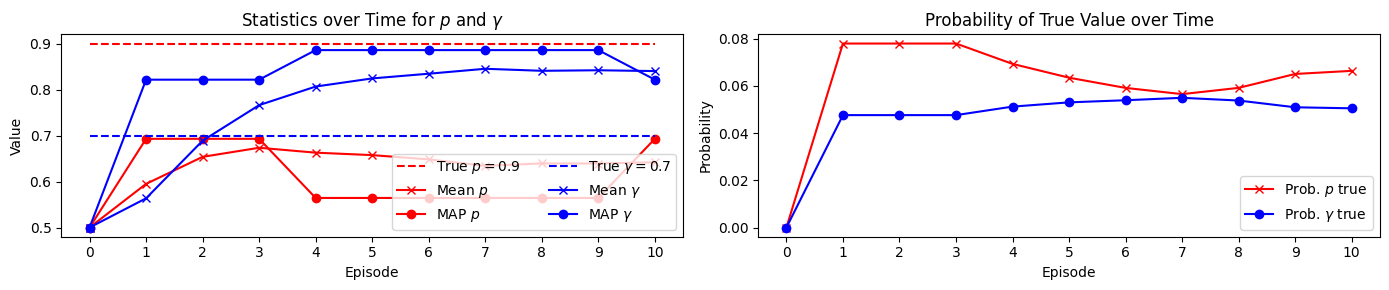

In [ ]:
pos_inference.plot_statistics_over_time(episode=10, true_params=true_params)

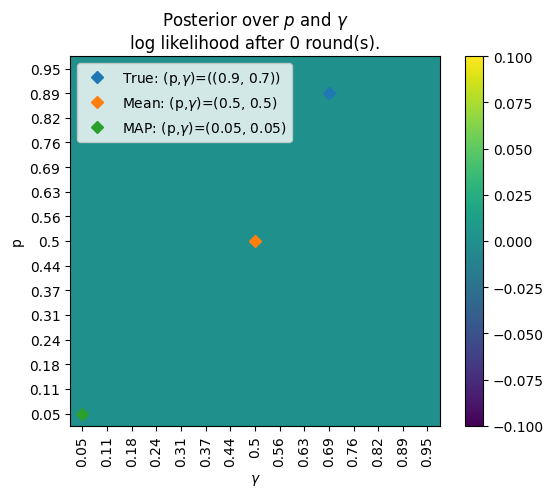

In [ ]:
pos_inference.plot_posterior(episode=0,
                   param_values=true_params, show_true_prob=False)